In [68]:
import re
import nltk
from nltk.tokenize import sent_tokenize
import spacy
from spacy import displacy
from termcolor import colored
from extraction import findSVOs
from topic_modelling import get_topics
import time
import en_core_web_lg
import networkx as nx
import matplotlib.pyplot as plt

In [60]:
with open('docs/text3.txt', 'r') as file:
    text = file.read()

In [45]:
# removing honorifics from the text

honorifics = "Ms. |Mrs. |Mr. |Dr. "
text = re.sub(honorifics, "", text)

In [46]:
# getting the NER using spaCy

nlp = en_core_web_lg.load()
doc = nlp(text)

entities = set()
for ent in doc.ents:
    entities.add(ent.text)
print(entities)

displacy.render(doc, style='ent', jupyter=True)

{'January 4, 2018', 'State', "Federal Bureau of Investigation, Division of Financial Industry and Justice Department's", 'Major League Baseball', 'Texas', 'Ash Narayan', 'The Atlanta Regional Office', 'Narayan', 'Harmon', 'John Kaptrosky', 'multi-million dollar', 'Jeff Sessions', '2013', 'Rule 10b-5', 'Exchange Act', 'four', 'ARCA', 'SEC', 'today', 'U.S.', 'the Northern District', 'Dallas', 'Office of Economic Analysis and Analysis', 'District Court', 'MLB', 'hundreds of thousands of dollars', 'Department of Justice', 'two', '1934', 'three', 'Richard Harmon', '1,000', 'The Ticket Reserve,', 'The Securities and Exchange Commission', 'Ponzi', 'Securities Exchange Act'}


In [47]:
f = sent_tokenize(text)

In [48]:
i=0

nodes = []

for sentence in f: 
    print('Sentence %d' %i)
    print('\n%s\n' %sentence)
    i+=1
    tokens = nlp(sentence)
    svos = findSVOs(tokens)
    nodes.append(svos)
    print(svos)
    print('\n\n<<------------------------------------------------------>>\n\n')

Sentence 0

The Securities and Exchange Commission charged Ash Narayan, Richard Harmon and John Kaptrosky with engaging in a multi-million dollar fraud that defrauded hundreds of thousands of dollars in investor funds.

[('The Securities Commission', 'charged', 'Ash Narayan , Harmon'), ('a million dollar fraud', 'defrauded', 'hundreds of thousands of dollars')]


<<------------------------------------------------------>>


Sentence 1

The SEC's complaint, filed in federal court in Dallas, Texas, alleges that the defendants concealed the fraud from their clients, including former MLB players, and lied to investors about the value of their investments.

[('SEC complaint ,', 'filed'), ('SEC complaint ,', 'alleges'), ('the defendants', 'concealed', 'the fraud'), ('their clients ,', 'including')]


<<------------------------------------------------------>>


Sentence 2

According to the SEC, the alleged fraud was carried out by the three of them, who were then employed by The Ticket Reserve

In [49]:
import spacy
from spacy import displacy

for sentence in f:
    doc = nlp(sentence)
    displacy.render(doc, style="dep")
    # print(doc['arcs'])

In [50]:
print(len(nodes))

9


In [51]:
final_nodes = []

for i in nodes:
    for j in i:
        if(len(j) == 3):
            final_nodes.append(j)
    print('next set of nodes')

next set of nodes
next set of nodes
next set of nodes
next set of nodes
next set of nodes
next set of nodes
next set of nodes
next set of nodes
next set of nodes


In [52]:
print(final_nodes)

[('The Securities Commission', 'charged', 'Ash Narayan , Harmon'), ('a million dollar fraud', 'defrauded', 'hundreds of thousands of dollars'), ('the defendants', 'concealed', 'the fraud'), ('the three of ,', 'carry', 'the alleged fraud'), ('The Ticket Reserve ,', 'employ', 'who'), ('2013', 'retire', 'who'), ('they', 'hid', 'the funds'), ('order', 'keep', 'the scheme'), ('Narayan', 'settle', 'the charges'), ('they', 'make', 'any further payments to any of the former clients'), ('The SEC', 'charged', 'the four individuals'), ('The Atlanta Regional Office ( ARCA )', 'announced', 'the entry of Act'), ('a final judgment', 'enjoining', 'the companies'), ('a final judgment', 'violating', 'the antifraud provisions of Section 10(b ) of')]



Total number of extracted pairs: 14

Edges:  ['charged', 'defrauded', 'concealed', 'carry', 'employ', 'retire', 'hid', 'keep', 'settle', 'make', 'charged', 'announced', 'enjoining', 'violating']

Entities:  [('The Securities Commission', 'charged', 'Ash Narayan , Harmon'), ('a million dollar fraud', 'defrauded', 'hundreds of thousands of dollars'), ('the defendants', 'concealed', 'the fraud'), ('the three of ,', 'carry', 'the alleged fraud'), ('The Ticket Reserve ,', 'employ', 'who'), ('2013', 'retire', 'who'), ('they', 'hid', 'the funds'), ('order', 'keep', 'the scheme'), ('Narayan', 'settle', 'the charges'), ('they', 'make', 'any further payments to any of the former clients'), ('The SEC', 'charged', 'the four individuals'), ('The Atlanta Regional Office ( ARCA )', 'announced', 'the entry of Act'), ('a final judgment', 'enjoining', 'the companies'), ('a final judgment', 'violating', 'the antifraud provisions of Section 10(b ) of')]

Graph generated


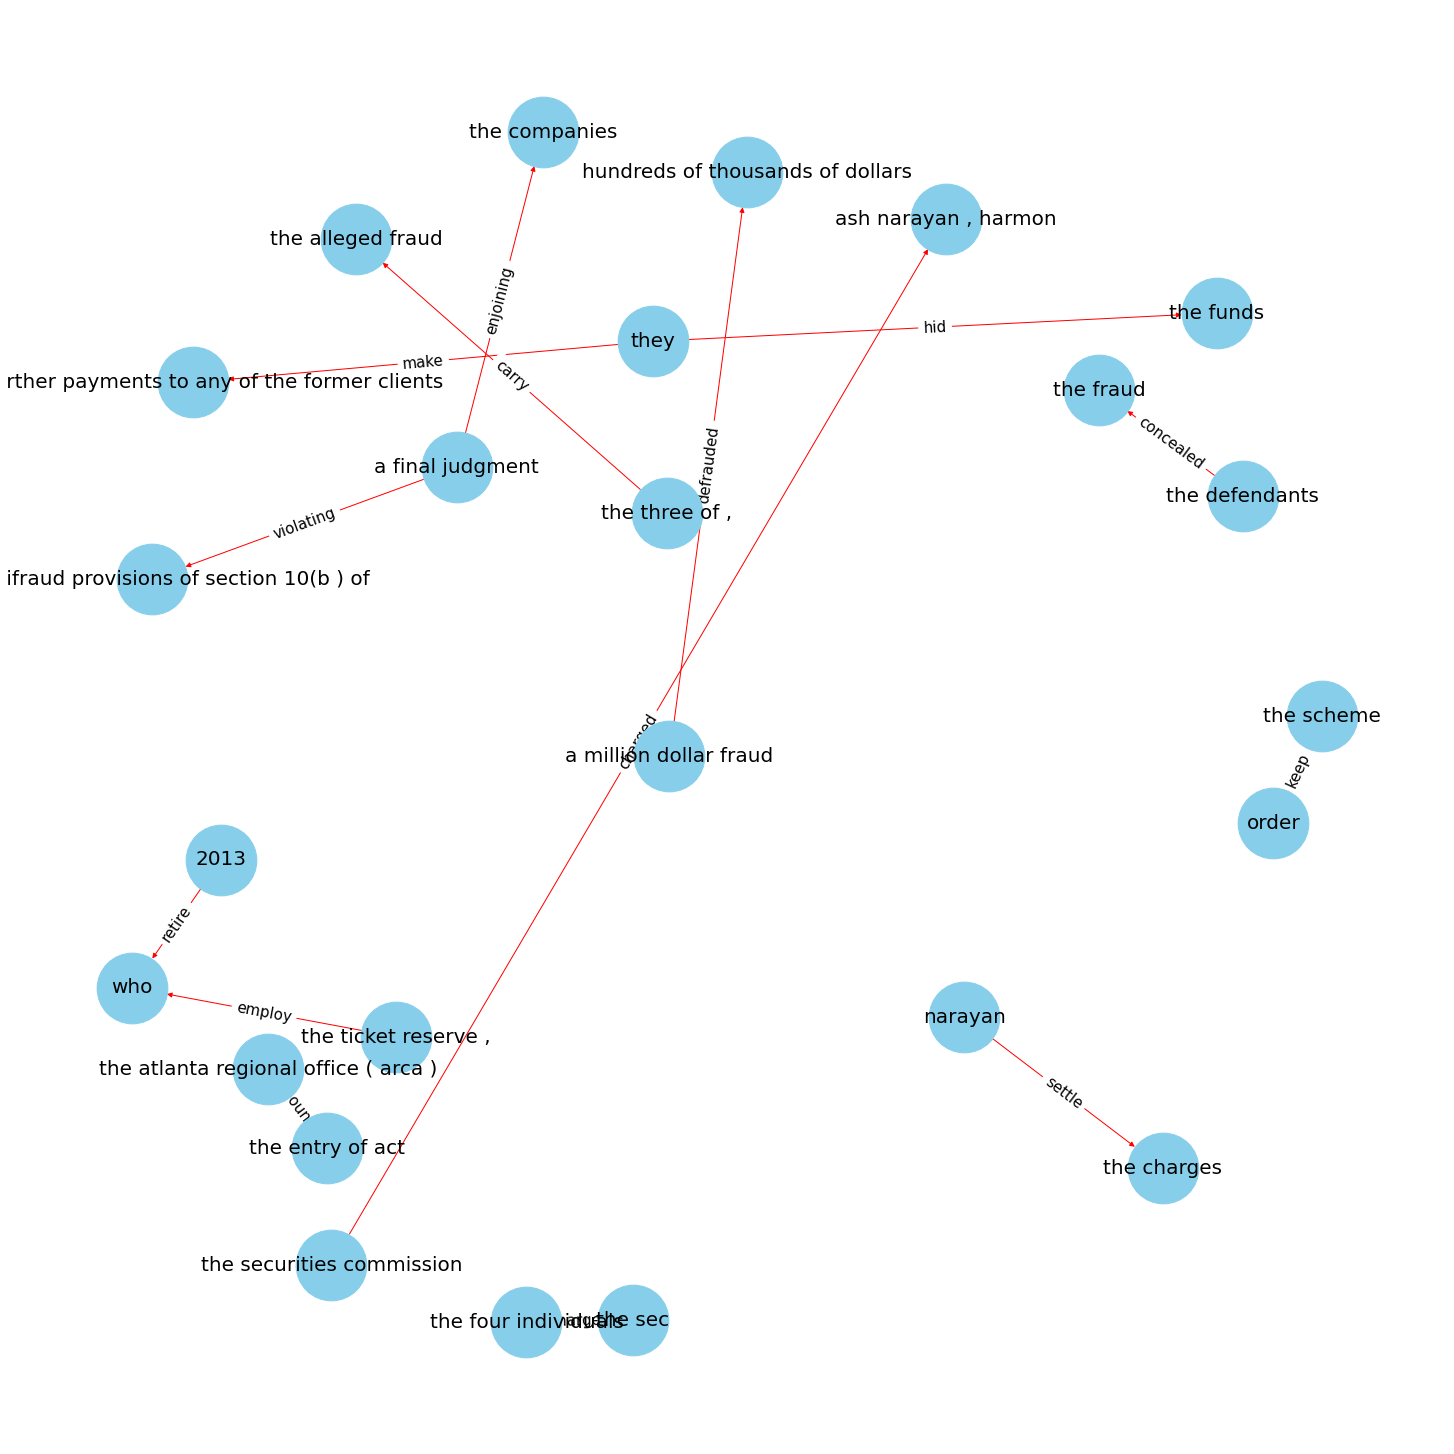

In [54]:
source = []
target = []
edge = []
indexes = []

for i in (range(len(final_nodes))):
    ent1 = (final_nodes[i][0])
    ent2 = (final_nodes[i][2])
    rel = final_nodes[i][1] 
    source.append(ent1.lower().strip())
    target.append(ent2.lower().strip())
    edge.append("".join(rel).strip())
    indexes.append(i)
print("\nTotal number of extracted pairs:", len(edge))
print("\nEdges: ", edge)
print("\nEntities: ", final_nodes)
if(len(edge)==0 or len(final_nodes)==0):
    print('False')
else:
    G = nx.DiGraph(directed=True)
    for i in (range(len(edge))):
        G.add_weighted_edges_from([(source[i],target[i],i)])
    print("\nGraph generated")
    size=20
    if len(edge)/2 > 20:
        size = len(edge)/2
    plt.figure(figsize=(size,size))
    edge_labels=dict([((u,v,),edge[d['weight']]) for u,v,d in G.edges(data=True)])
    pos = nx.spring_layout(G,k=0.8)
    nx.draw(G, with_labels=True, node_color='skyblue', node_size=5000, edge_color='r', edge_cmap=plt.cm.Blues, pos = pos, font_size=20)
    nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels, font_size=15)
    #plt.savefig("graph.png")

In [23]:
print(final_nodes[1][0])

The Commission



Total number of extracted pairs: 18

Edges:  ['entered', 'revoked', 'orchestrated', 'overvalued', 'sold', 'sold', 'deceived', 'charges', 'consent', 'determine', 'determine', 'charged', 'obtained', 'enjoining', 'violating', 'pay', 'pay', 'pay']

Entities:  [('Judge Denise L. Cote of for', 'entered', 'a partial judgment against'), ('The Commission', 'revoked', 'IIG registration'), ('Hu', 'orchestrated', 'multiple frauds on IIG investment advisory clients'), ('Hu', 'overvalued', 'the assets in IIG flagship hedge fund'), ('Hu', 'sold', 'least $ 60 million in fake finance loans'), ('Hu', 'sold', 'to investors'), ('Hu', 'deceived', 'IIG clients'), ('The complaint ,', 'charges', 'Hu'), ('a bifurcated settlement', 'consent', 'Hu'), ('the court', 'determine', 'an amount'), ('a later date upon motion of', 'determine', 'an amount'), ('The SEC', 'charged', 'IIG'), ('the SEC', 'obtained', 'a final judgment on consent'), ('consent', 'enjoining', 'IIG'), ('consent', 'violating', 'the antifraud provi

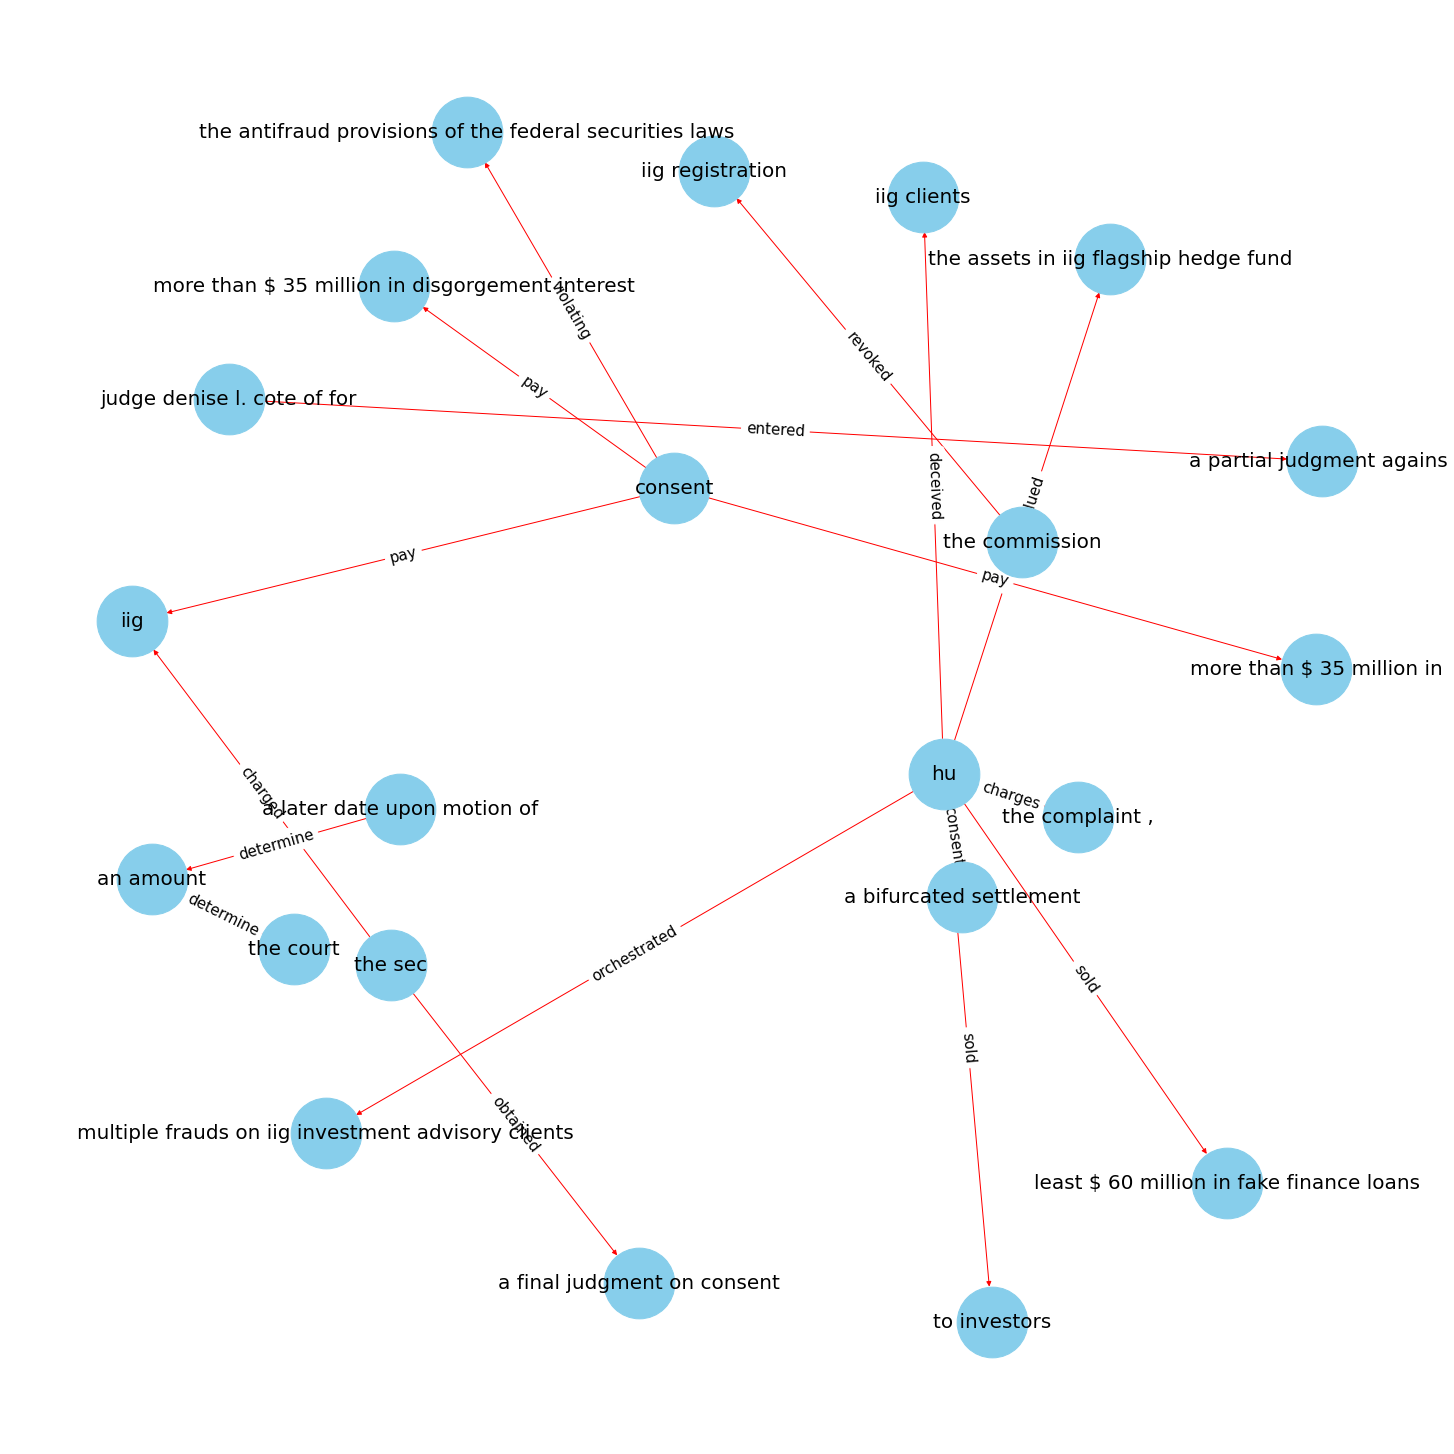

In [69]:
topics = get_topics('docs/text3.txt', 1)

cnt=-1
for i in topics:
    cnt+=1
    final_nodes = []
    nodes = []
    for sentence in topics[i]: 
        tokens = nlp(sentence)
        svos = findSVOs(tokens)
        nodes.append(svos)
    for i in nodes:
        for j in i:
            if(len(j) == 3):
                final_nodes.append(j)
    (create_graph(final_nodes))
    name = str(time.time())
    plt.savefig('./images/' + name + '.png')

In [61]:
nodes = get_entities(text)

In [62]:
print(nodes)

['who', 'who', 'hid', 'who', 'who', 'hid', ('Judge Denise L. Cote of for', 'entered', 'a partial judgment against'), ('The Commission', 'revoked', 'IIG registration'), ('Hu', 'orchestrated', 'multiple frauds on IIG investment advisory clients'), ('Hu', 'overvalued', 'the assets in IIG flagship hedge fund'), ('Hu', 'sold', 'least $ 60 million in fake finance loans'), ('Hu', 'sold', 'to investors'), ('Hu', 'deceived', 'IIG clients'), ('The complaint ,', 'charges', 'Hu'), ('a bifurcated settlement', 'consent', 'Hu'), ('the court', 'determine', 'an amount'), ('a later date upon motion of', 'determine', 'an amount'), ('The SEC', 'charged', 'IIG'), ('the SEC', 'obtained', 'a final judgment on consent'), ('consent', 'enjoining', 'IIG'), ('consent', 'violating', 'the antifraud provisions of the federal securities laws'), ('consent', 'pay', 'IIG'), ('consent', 'pay', 'more than $ 35 million in disgorgement interest'), ('consent', 'pay', 'more than $ 35 million in')]


In [58]:
def create_graph(final_nodes):
    source = []
    target = []
    edge = []
    indexes = []

    for i in (range(len(final_nodes))):
        ent1 = (final_nodes[i][0])
        ent2 = (final_nodes[i][2])
        rel = final_nodes[i][1] 
        source.append(ent1.lower().strip())
        target.append(ent2.lower().strip())
        edge.append("".join(rel).strip())
        indexes.append(i)
    print("\nTotal number of extracted pairs:", len(edge))
    print("\nEdges: ", edge)
    print("\nEntities: ", final_nodes)
    if(len(edge)==0 or len(final_nodes)==0):
        print('False')
    else:
        G = nx.DiGraph(directed=True)
        for i in (range(len(edge))):
            G.add_weighted_edges_from([(source[i],target[i],i)])
        print("\nGraph generated")
        size=20
        if len(edge)/2 > 20:
            size = len(edge)/2
        plt.figure(figsize=(size,size))
        edge_labels=dict([((u,v,),edge[d['weight']]) for u,v,d in G.edges(data=True)])
        pos = nx.spring_layout(G,k=0.8)
        nx.draw(G, with_labels=True, node_color='skyblue', node_size=5000, edge_color='r', edge_cmap=plt.cm.Blues, pos=pos, font_size=20)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels, font_size=15)
        return G


Total number of extracted pairs: 24

Edges:  ['h', 'h', 'i', 'h', 'h', 'i', 'entered', 'revoked', 'orchestrated', 'overvalued', 'sold', 'sold', 'deceived', 'charges', 'consent', 'determine', 'determine', 'charged', 'obtained', 'enjoining', 'violating', 'pay', 'pay', 'pay']

Entities:  ['who', 'who', 'hid', 'who', 'who', 'hid', ('Judge Denise L. Cote of for', 'entered', 'a partial judgment against'), ('The Commission', 'revoked', 'IIG registration'), ('Hu', 'orchestrated', 'multiple frauds on IIG investment advisory clients'), ('Hu', 'overvalued', 'the assets in IIG flagship hedge fund'), ('Hu', 'sold', 'least $ 60 million in fake finance loans'), ('Hu', 'sold', 'to investors'), ('Hu', 'deceived', 'IIG clients'), ('The complaint ,', 'charges', 'Hu'), ('a bifurcated settlement', 'consent', 'Hu'), ('the court', 'determine', 'an amount'), ('a later date upon motion of', 'determine', 'an amount'), ('The SEC', 'charged', 'IIG'), ('the SEC', 'obtained', 'a final judgment on consent'), ('cons

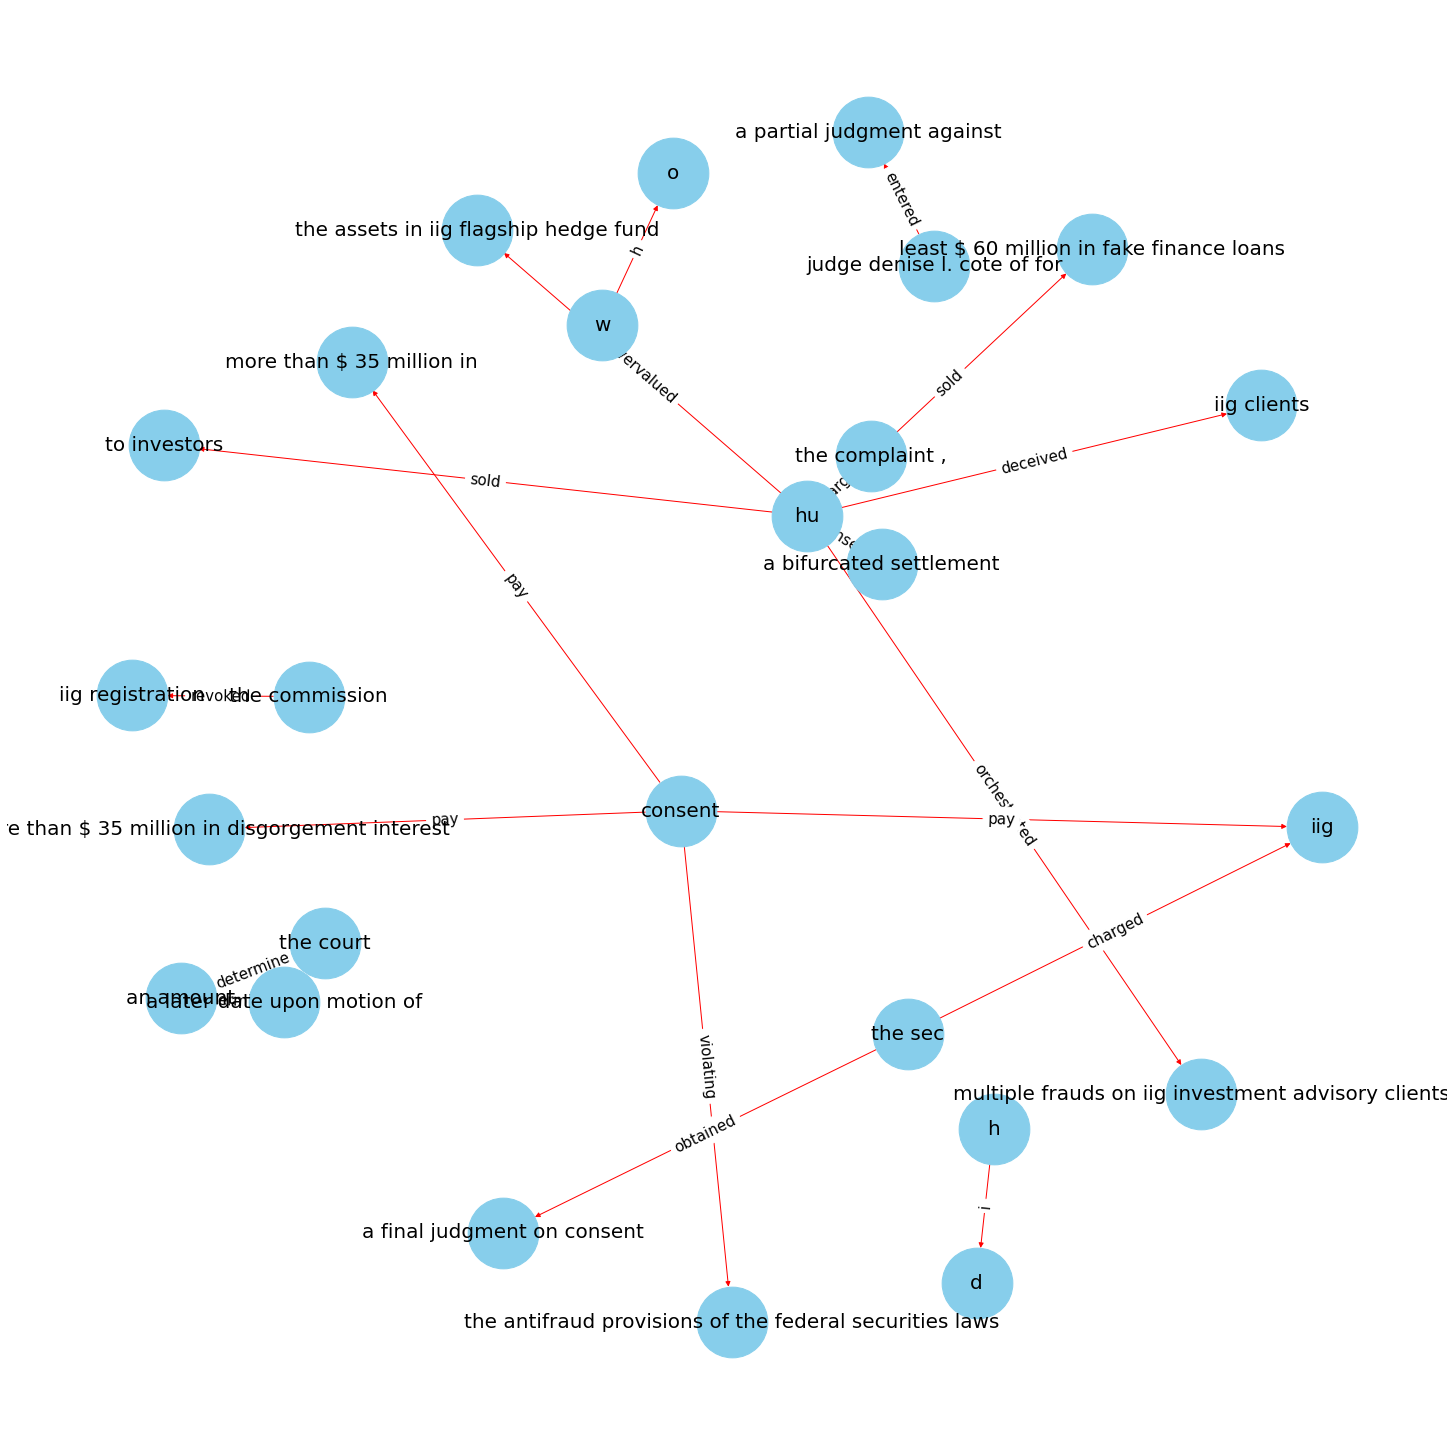

In [63]:
create_graph(nodes)